<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ABSTRACT" data-toc-modified-id="ABSTRACT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ABSTRACT</a></span></li><li><span><a href="#DISCOVERY" data-toc-modified-id="DISCOVERY-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DISCOVERY</a></span></li><li><span><a href="#DATA-SELECTION" data-toc-modified-id="DATA-SELECTION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA SELECTION</a></span></li><li><span><a href="#DATA-CLEANING" data-toc-modified-id="DATA-CLEANING-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DATA CLEANING</a></span></li><li><span><a href="#DATA-EXPLORATION" data-toc-modified-id="DATA-EXPLORATION-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DATA EXPLORATION</a></span></li><li><span><a href="#DATA-TRASFORMATION" data-toc-modified-id="DATA-TRASFORMATION-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DATA TRASFORMATION</a></span><ul class="toc-item"><li><span><a href="#Transforming-the-'food'-dataset,-creating-subdatasets-with-data-from-China,-India-and-the-USA" data-toc-modified-id="Transforming-the-'food'-dataset,-creating-subdatasets-with-data-from-China,-India-and-the-USA-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Transforming the 'food' dataset, creating subdatasets with data from China, India and the USA</a></span><ul class="toc-item"><li><span><a href="#China:" data-toc-modified-id="China:-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>China:</a></span></li><li><span><a href="#India" data-toc-modified-id="India-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>India</a></span></li><li><span><a href="#The-USA" data-toc-modified-id="The-USA-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>The USA</a></span></li></ul></li></ul></li><li><span><a href="#DATA-VISUALIZATION" data-toc-modified-id="DATA-VISUALIZATION-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DATA VISUALIZATION</a></span></li><li><span><a href="#CONCLUSIONI-E-RIFLESSIONI" data-toc-modified-id="CONCLUSIONI-E-RIFLESSIONI-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>CONCLUSIONI E RIFLESSIONI</a></span></li><li><span><a href="#NEXT-STEPS" data-toc-modified-id="NEXT-STEPS-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>NEXT STEPS</a></span></li></ul></div>

# ABSTRACT

This work has been done for the 'Data Manipulation and Visualization project' for the 'Data Science'
course provided by Start to Impact.
In this study I wanted to try to evaluate the environmental impact of food production, in terms of emissions
for the realization of the single product. I was not satised with the data provided by Kaggle for this study,
and I also wanted to evaluate the population trend and food waste over time, with the desire to expand this
study.
Statistically speaking, all the variables I've taken into account are continuous numerical. In particular, it
is typical of Data Science projects to study data often eliminating (or consider, in some way separately) the
outliers, dening them as values 'very out of the ordinary compared to the others'. In this study, instead,
I believe that the outliers were worthy of study compared to the other values; this way, I studied the trend
over time of the most polluting products and of those which are the most produced worldwide; it turned out
that the highest productions are in China, India and the USA and, for this reason, these three areas have
been studied in terms of food production, population trends and food waste.
Before going on, consider that this is the original project, as I have delivered it; in the future, there will
be changes for shure (see the 'future work' section).

# DISCOVERY

Importing data on food consumption, emissions, population and food waste:

In [1]:
import pandas as pd

In [3]:
#importing food data
food = pd.read_csv('data/fao.csv', encoding = 'ISO-8859-1') #ISO-8859-1 necessary to fix an importation error

#importing consumption data
cons = pd.read_csv('data/Food_Production.csv')

#importing the population data
pop = pd.read_csv('data/population-since-1800.csv')

#importing the food waste data
waste = pd.read_csv('data/Data_waste.csv')

# DATA SELECTION

The datsets provided for this project are from Kaggle.
Here (https://www.kaggle.com/dorbicycle/world-foodfeed-production/home) the dataset of the food consumption; the data has been provided by the FAO organization, but you
can dawnload the dataset from Kaggle, clicking on the link.
Here (https://www.kaggle.com/selfvivek/environment-impact-of-food-production) the other dataset provided for this project; it has stored the data for the food emissions.
In addition to the datasets provided, I wanted to study the food waste and the population growth, so I
found other two datasets:
 Here (https://ourworldindata.org/world-population-growth) the population growth
 Here (https://www.fao.org/platform-food-loss-waste/flw-data/en/) the food waste

Anyway, you can dowload all the CSV file from the 'data' folder of thir repository

# DATA CLEANING

In the 'cons' dataframe there are lines which have all 'Nan' values, for the pollution values; this means that
I cannot analyze these lines from the point of view of the emissions, so I clean up the dataset by deleting
them.

In [28]:
#dropping rows with all 'Nans' in the 'cons' dtaframe
cons.dropna(axis=0, how='all', subset=['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'], inplace=True)

#dropping all the rows with 0 values in the columns related to the year of production in the 'food' dataframe
food = food.loc[(food.loc[:, 'Y1961':'Y2013']!=0).any(axis=1)]

# DATA EXPLORATION

I go on, choosing the data (the variables) that I want to analyze, giving a brief explanation of what they
represent.
In terms of emissions, there are many variables that can be taken into consideration; some, however, are
not recognized by the international community as real values that indicate pollution (for example, Scarcity-
weighted water).
I decide to take into consideration the following pollution parameters:
 total emissions
 greenhouse gas emissions
So, I go on, doing some data exoloration of these two parameters.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

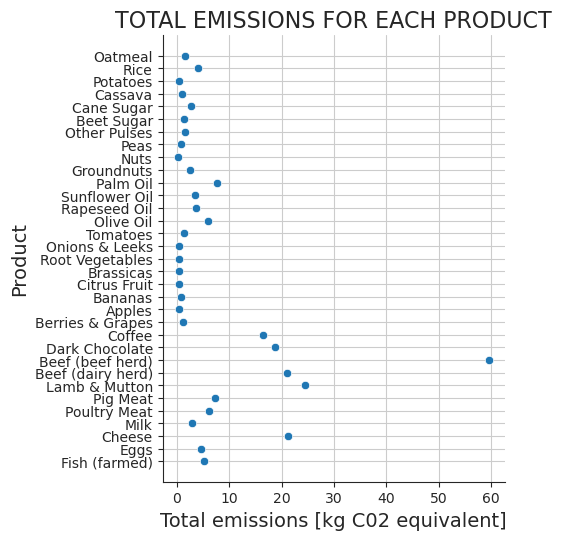

In [8]:
#plotting a scatterplot with total emissions
sns.relplot(data=cons, x='Total_emissions', y='Food product')

#labeling
plt.title(f'TOTAL EMISSIONS FOR EACH PRODUCT', fontsize=16) #plot TITLE
plt.xlabel('Total emissions [kg C02 equivalent]', fontsize=14) #x-axis label
plt.ylabel('Product', fontsize=14) #y-axis label

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})

#show plot
plt.show()

I immediately found an interesting result: all products basically generate similar emissions. Beef herd is
an outlier, which generates 60 kg C02 (per kg of product).

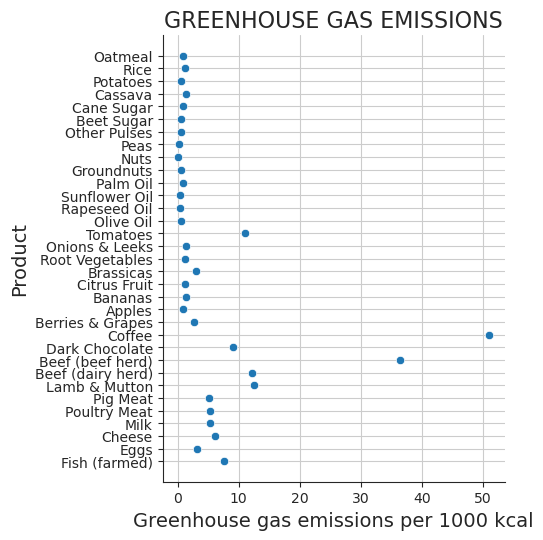

In [10]:
#plotting a scatterplot with Greenhouse gas
sns.relplot(data=cons, x='Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', y='Food product')

#labeling
plt.title('GREENHOUSE GAS EMISSIONS', fontsize=16) #plot TITLE
plt.xlabel('Greenhouse gas emissions per 1000 kcal', fontsize=14) #x-axis label
plt.ylabel('Product', fontsize=14) #y-axis label

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})

#show plot
plt.show()

Here the outliers are coee and beef herd. Those are, therefore, the products that generate the most
greenhouse gas emissions.

Now, I want to take a look at the 'food' dataframe. I want to try to understand, at this stage, if there are
products that are made more than others; and I would also like to nd out if there is an area where certain
foods are produced more than in other areas.
To do this, I make an average of the production values from 1961 to 2013 for each product, and I make a
scatter plot that allows me to identify the latitude of the area.


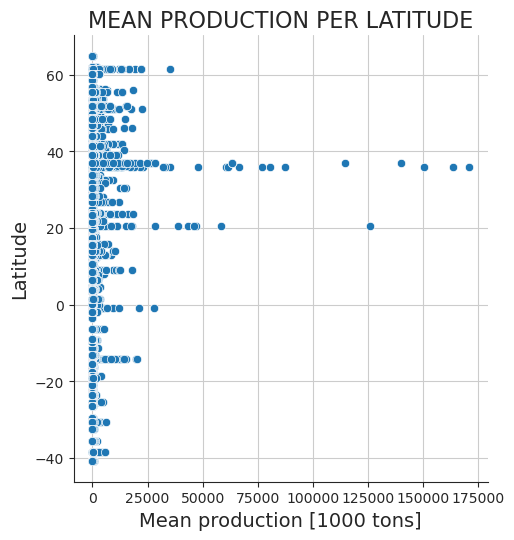

In [11]:
#calculating the mean value of production for every year and adding it as a column in the 'food' dataframe
food['mean'] = food.loc[:, 'Y1961':'Y2013'].mean(axis=1)

#plotting a scatterplot with the mean production values related to the latitude
sns.relplot(data=food, x='mean', y='latitude')

#defining the size of the figure
sns.set(rc={'figure.figsize':(30,15)})

#labeling
plt.title(f'MEAN PRODUCTION PER LATITUDE', fontsize=16) #plot TITLE
plt.xlabel('Mean production [1000 tons]', fontsize=14) #x-axis label
plt.ylabel('Latitude', fontsize=14) #y-axis label

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})

#show plot
plt.show()

This graph shows the fact that there is a zone (or more zones) around the latitude of 40 ° in which, on average,
there is a large production of some goods, compared to others; they are all those outliers that have values
over 50k.
Then there is an area, around latitude 20, in which on average there are some outliers that go beyond
values of 50k.
Now I want to understand if these values are more related to production for humans ('food') or for animals
('feed').

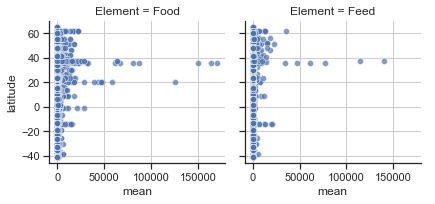

In [12]:
#defining the criteria to divide the plot (the 'Element' column)
g = sns.FacetGrid(food, col='Element')


#defininf the plot details
g.map(sns.scatterplot, "mean", "latitude", alpha=.7)

#show legend
g.add_legend()

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})

#show plot
plt.show()

Referring to the outliers indicated before, the graph above shows that there is a certain specularity between
products made for humans and those for animals, at the same latitude.


With regard to the outliers of the two graphs above, I want to understand what products they are and in
which areas they are produced, because this information will be useful in the following analyses. So, I create
a subdataframe that has average production values greater than 45k to obtain this information.

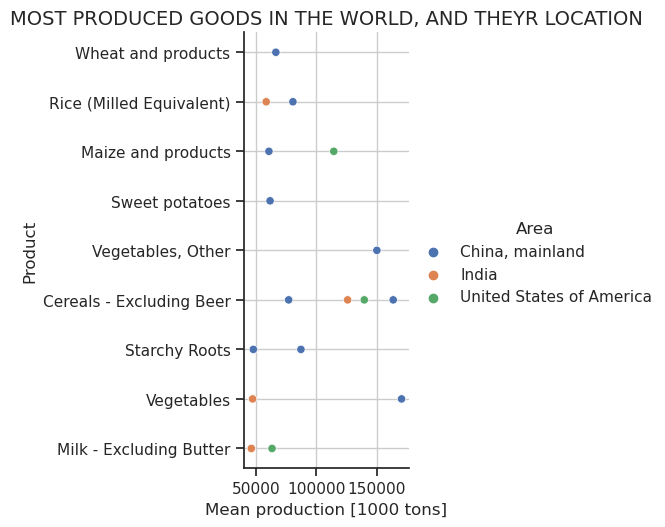

In [12]:
#creating subdataframe
a = food[food['mean']>=45000]

#plotting a scatterplot with the mean production values related to the product
sns.relplot(data=a, x='mean', y='Item', hue='Area')

#defining the size of the figure
sns.set(rc={'figure.figsize':(30,15)})

#labeling
plt.title(f'MOST PRODUCED GOODS IN THE WORLD, AND THEYR LOCATION', fontsize=14) #plot TITLE
plt.xlabel('Mean production [1000 tons]', fontsize=12) #x-axis label
plt.ylabel('Product', fontsize=12) #y-axis label

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})

#show plot
plt.show()

This way, I identied the products with the highest (average) production in the world and the areas in which
they are produced; as expected, the areas of maximum world production are China, India and the USA,
with China having the largest number of production sites. Now, I want to understand how these values are
divided, in these areas, according to the categories 'food' and 'feed'.

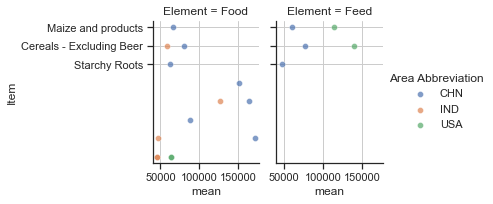

In [15]:
#defining the criteria to divide the plot (the 'Element' column)
g = sns.FacetGrid(a, col='Element', hue='Area Abbreviation')

#defininf the plot details
g.map(sns.scatterplot, "mean", "Item", alpha=.7)

#show legend
g.add_legend()

#showing grid for better visualization
sns.set_style("ticks",{'axes.grid' : True})


#show plot
plt.show()

Most of the products with the largest production in the world are produced for humans. For this reason,
in the following discussion we will study the trend of production over time of products for human nutrition
only.

# DATA TRASFORMATION

Now, I can manipulate the dataframes to make the nal visualizations and to draw conclusions.
The areas that present the products with the highest world production, as we have seen, are China, India
and the USA; I create a sub-dataframe of the population dataframe that allows me to subsequently study
its trend over time.

In [20]:
#selecting 'China', 'India' and 'United States' from pop dataframe and filtering for years 1961-2013
sub_pop = pop.loc[(pop['Entity'] == 'China') | (pop['Entity'] == 'India') | (pop['Entity'] == 'United States')]

#renaming population data column
sub_pop = sub_pop.rename(columns={"Population (historical estimates)": "Population"})

## Transforming the 'food' dataset, creating subdatasets with data from China, India and the USA

### China:

In [22]:
#creating a 'years' Pandas series to be used in the next steps
years = pd.Series(range(1961,2014), dtype="Int64")

#China subdataframe
china = food[food['Area'].str.startswith('China, mainland') & food['Element'].str.startswith('Food')]

#transposing
chn = china.set_index('Item').T

#droping unnecessary rows
chn = chn.drop(axis=0, labels=['Area','Area Abbreviation', 'Area Code', 'Item Code', 'Element Code',
                               'latitude', 'longitude', 'Unit', 'Element', 'mean'])

#adding years column
chn['years'] = years.values

#melting columns to study: most 'polutant food'
chn_pol = pd.melt(chn, id_vars=['years'],
                value_vars=['Bovine Meat', 'Coffee and products', 'Milk - Excluding Butter', 'Meat'],
                var_name='food')

#melting columns to study: most 'produced food'
chn_prod = pd.melt(chn, id_vars=['years'],
                value_vars=['Wheat and products', 'Rice (Milled Equivalent)', 'Maize and products', 'Sweet potatoes',
                           'Vegetables, Other', 'Cereals - Excluding Beer','Starchy Roots', 'Vegetables',
                           'Milk - Excluding Butter'],
                var_name='food')

### India

In [23]:
#India subdataframe
india = food[food['Area'].str.startswith('India') & food['Element'].str.startswith('Food')]

#transposing
ind = india.set_index('Item').T

#droping unnecessary rows
ind = ind.drop(axis=0, labels=['Area','Area Abbreviation', 'Area Code', 'Item Code', 'Element Code',
                               'latitude', 'longitude', 'Unit', 'Element','mean'])

#adding years column
ind['years'] = years.values

#melting columns to study: most 'polutant food'
ind_pol = pd.melt(ind, id_vars=['years'],
                value_vars=['Bovine Meat', 'Coffee and products', 'Milk - Excluding Butter', 'Meat'],
                var_name='food')

#melting columns to study: most 'produced food'
ind_prod = pd.melt(ind, id_vars=['years'],
                value_vars=['Wheat and products', 'Rice (Milled Equivalent)', 'Maize and products', 'Sweet potatoes',
                           'Vegetables, Other', 'Cereals - Excluding Beer','Starchy Roots', 'Vegetables',
                           'Milk - Excluding Butter'],
                var_name='food')

### The USA

In [24]:
#USA subdataframe
usa = food[food['Area'].str.startswith('United States') & food['Element'].str.startswith('Food')]

#transposing
us = usa.set_index('Item').T

#droping unnecessary rows
us = us.drop(axis=0, labels=['Area','Area Abbreviation', 'Area Code', 'Item Code', 'Element Code',
                               'latitude', 'longitude', 'Unit', 'Element', 'mean'])

#adding years column
us['years'] = years.values

#melting columns to study: most 'polutant food'
us_pol = pd.melt(us, id_vars=['years'],
                value_vars=['Bovine Meat', 'Coffee and products', 'Milk - Excluding Butter', 'Meat'],
                var_name='food')

#melting columns to study: most 'produced food'
us_prod = pd.melt(us, id_vars=['years'],
                value_vars=['Wheat and products', 'Rice (Milled Equivalent)', 'Maize and products', 'Sweet potatoes',
                           'Vegetables, Other', 'Cereals - Excluding Beer','Starchy Roots', 'Vegetables',
                           'Milk - Excluding Butter'],
                var_name='food')

I conclude the data manipulation by creating 3 subdataframes for the food waste values for China, India and
the USA:

In [25]:
#Chia waste
waste_chn = waste.loc[(waste['country'] =='China')]

#USA waste
waste_usa = waste.loc[(waste['country'] =='United States of America')]

#India waste
waste_india = waste.loc[(waste['country'] =='India')]

# DATA VISUALIZATION

First, let's see how the population trend has been over time for the USA, China and India:

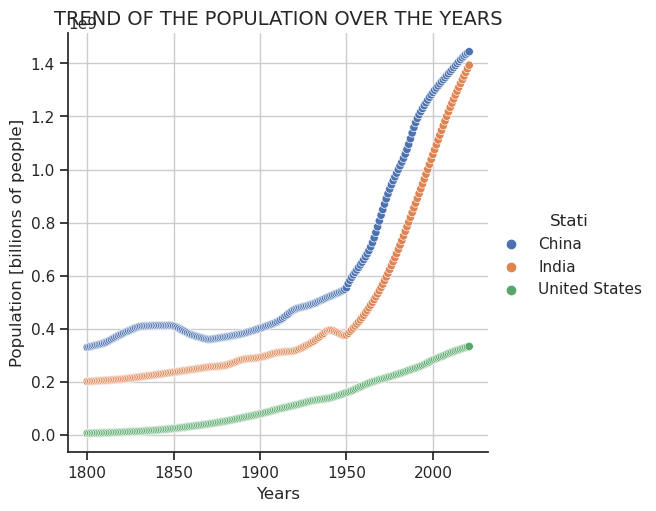

In [26]:
#population plot
g = sns.relplot(data=sub_pop, x='Year', y='Population', hue='Entity')

#labeling
g.legend.set_title('Stati') #legend title
plt.title(f'TREND OF THE POPULATION OVER THE YEARS', fontsize=14) #plot TITLE
plt.xlabel('Years', fontsize=12) #x-axis label
plt.ylabel('Population [billions of people]', fontsize=12) #y-axis label

#showing plot
plt.show()

As we can see from the graph above, China and India, starting from 1950, have signicant
population increases which appear to be exponential (although they are certainly not exponential).
In particular, if we consider that in January 2022 the world population reached 8 billion
(source: Google), half of the world population is approximately in India and China; the graph
shows us, in fact, that from the year 2'000 onwards, in both areas, the population is about 1
and a half billion people for both India and China. This certainly justies an increase in food
production in these two areas.
In the United States, on the other hand, the population has a growing trend, but in a much
'milder', way compared to China and India.

Now, I'm going to study the production of the products that generate the most pollution and
those most produced for China.

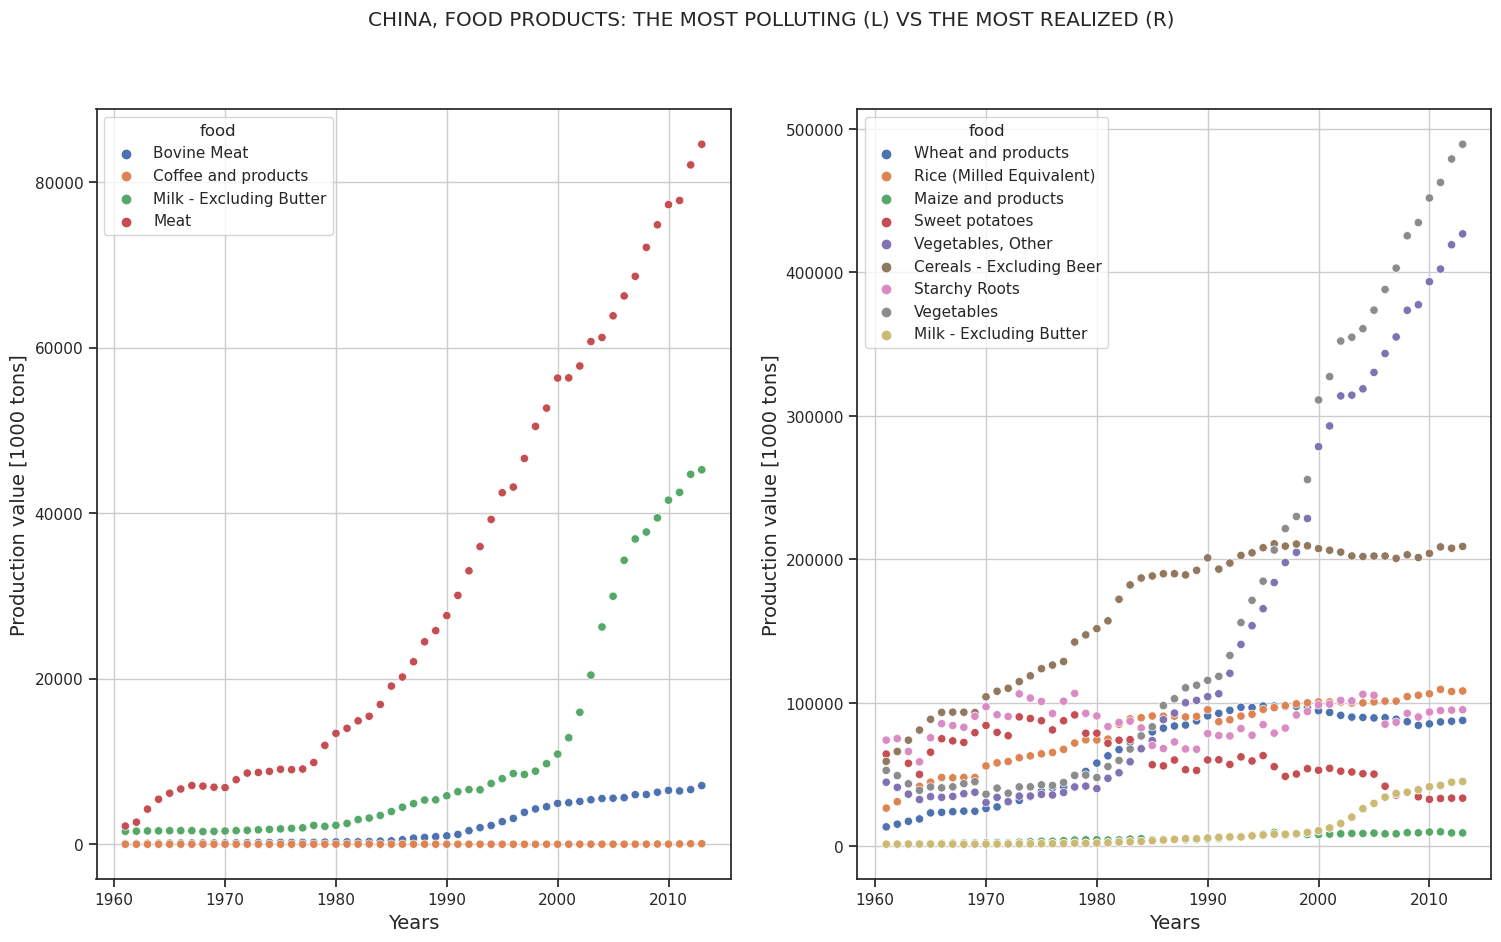

In [27]:
#plotting products of China
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#defining plots
sns.scatterplot(data=chn_pol, x='years', y='value', hue='food', ax=axes[0])
sns.scatterplot(data=chn_prod, x='years', y='value', hue='food', ax=axes[1])

#labeling
fig.suptitle('CHINA, FOOD PRODUCTS: THE MOST POLLUTING (L) VS THE MOST REALIZED (R)')
axes[0].set_xlabel('Years', fontsize=14) #xlabel, left plot
axes[0].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, left plot
axes[1].set_xlabel('Years', fontsize=14) #xlabel, right plot
axes[1].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, right plot

#showing plot
plt.show()

The graphs above shows us that in China the products that generate the most pollution in their
production (left graph) are meat - which increases with a particularly steep trend - and milk.
The quantities produced, however, are much lower than the most produced products which are
vegetables (gray and purple dots in the graph on the right). In particular, around the year 2010,
the production of vegetables in China reached about 500k (for 1'000 tons), which is a much higher
value than the other products made.
I wanted to go beyond this data. In fact, an almost exponential population increases can justify
an increase in food production; however, I asked myself: is there any waste of food? And if so,
how much is it worth?

Let's see it.

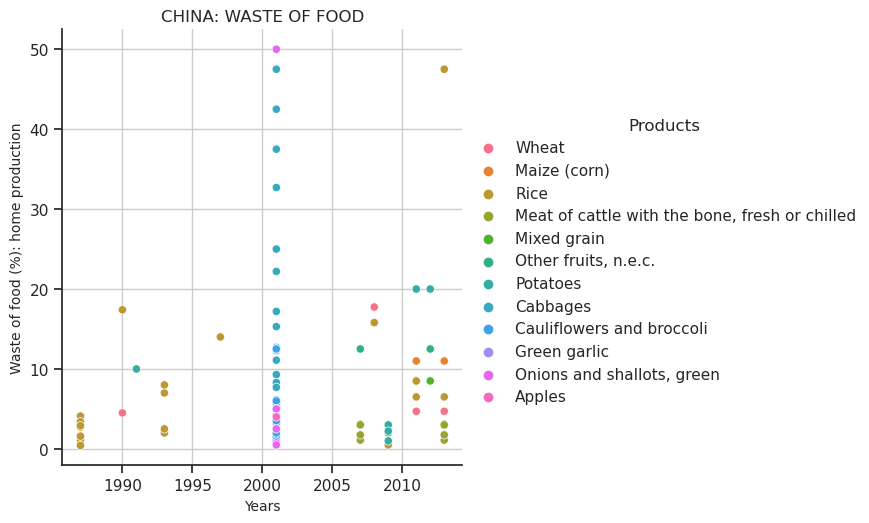

In [30]:
#plotting food waste in China
l = sns.relplot(data=waste_chn, x='year', y='loss_percentage', hue='commodity')

#labeling
l.legend.set_title('Products') #legend title
plt.title(f'CHINA: WASTE OF FOOD', fontsize=12) #plot TITLE
plt.xlabel('Years', fontsize=10) #x-axis label
plt.ylabel('Waste of food (%): home production', fontsize=10) #y-axis label

#plotting
plt.show()

This graph tells us a very interesting thing: home food waste in China is very low, with one exception around
the early 2000s. As you can see, in fact, the wasted products are few and, on average, the percentage of
waste is under 20%.
It should be noted, however, that the waste is not on vegetables, but there is some waste on the 'meat of
cattle'.

I continue the analysis with India.

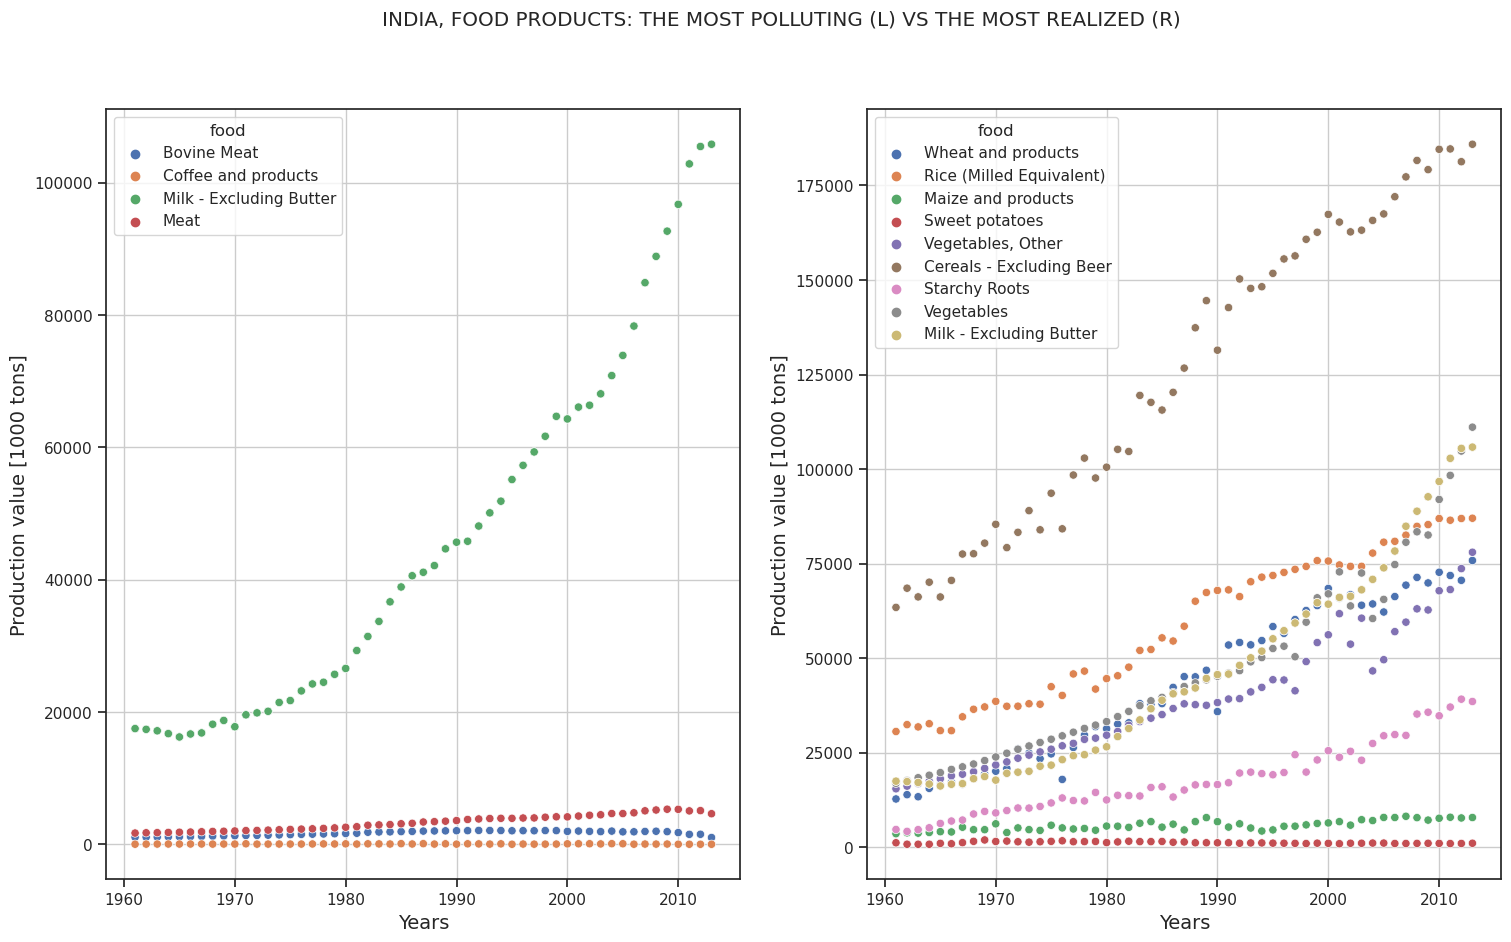

In [31]:
#plotting products of India
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#defining plots
sns.scatterplot(data=ind_pol, x='years', y='value', hue='food', ax=axes[0])
sns.scatterplot(data=ind_prod, x='years', y='value', hue='food', ax=axes[1])

#labeling
fig.suptitle('INDIA, FOOD PRODUCTS: THE MOST POLLUTING (L) VS THE MOST REALIZED (R)')
axes[0].set_xlabel('Years', fontsize=14) #xlabel, left plot
axes[0].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, left plot
axes[1].set_xlabel('Years', fontsize=14) #xlabel, right plot
axes[1].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, right plot

#showing plot
plt.show()

As for India, the product that generates the most pollution in its production is milk and it has a strongly
increasing trend over time, but also in this case the maximum production - which is cereals - has lower
quantities.

Also in this case, let's see the waste.

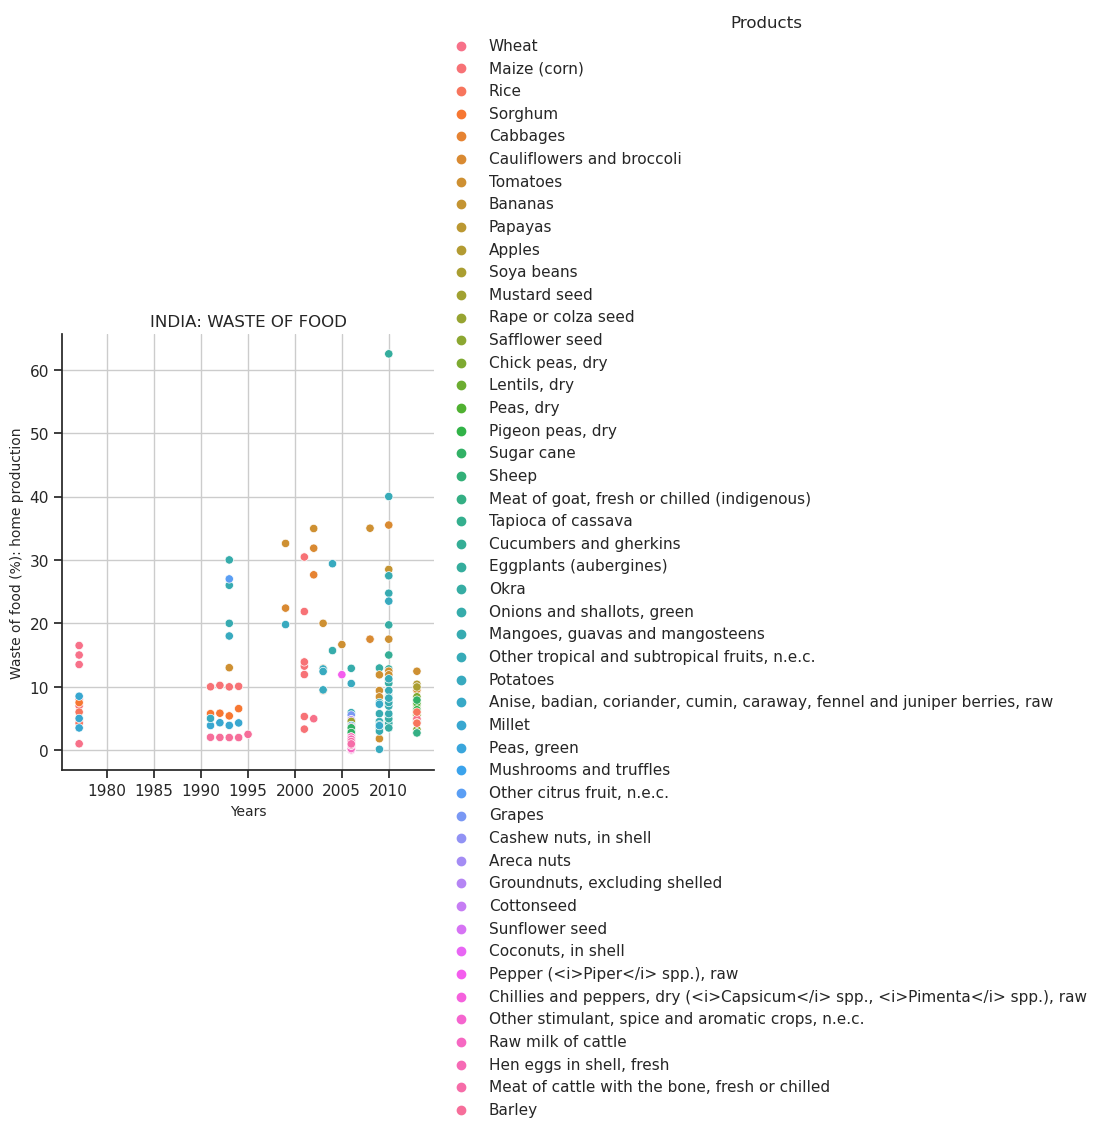

In [32]:
#plotting food waste in China
m = sns.relplot(data=waste_india, x='year', y='loss_percentage', hue='commodity')

#labeling
m.legend.set_title('Products') #legend title
plt.title(f'INDIA: WASTE OF FOOD', fontsize=12) #plot TITLE
plt.xlabel('Years', fontsize=10) #x-axis label
plt.ylabel('Waste of food (%): home production', fontsize=10) #y-axis label

#plotting
plt.show()

As we can see from this graph, the waste of food in India is greater than in China, both in terms of wasted
products and in terms of percentages of wasted products. It would be interesting to understand why the
waste around the '80s is zero; probably, it's just a lack of data.

I conclude the analysis with the United States.

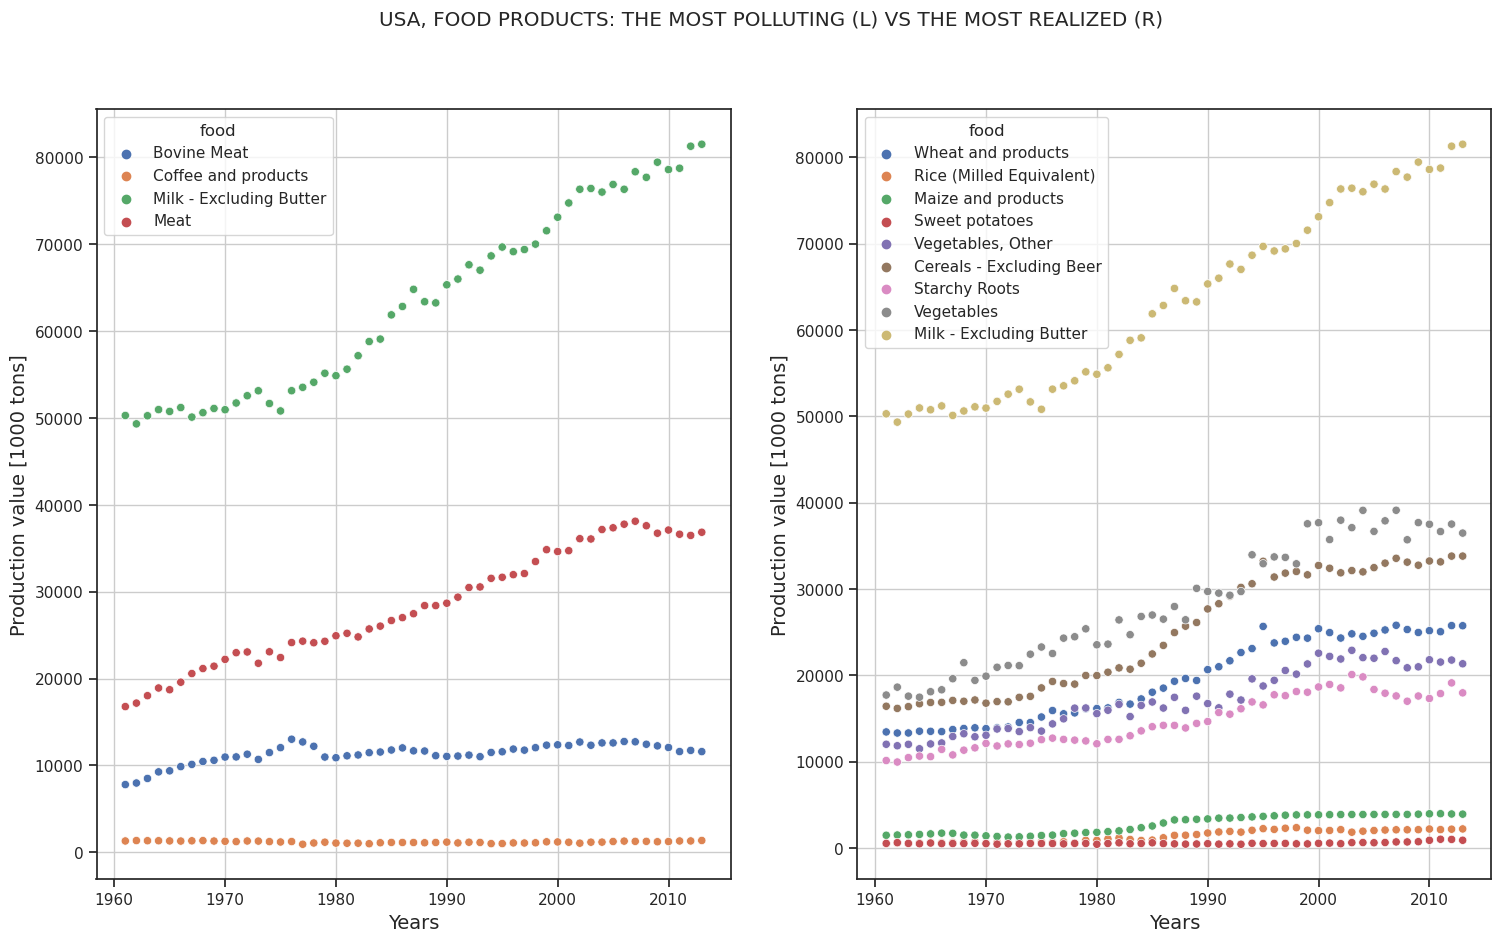

In [33]:
#plotting products of USA
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#defining plots
sns.scatterplot(data=us_pol, x='years', y='value', hue='food', ax=axes[0])
sns.scatterplot(data=us_prod, x='years', y='value', hue='food', ax=axes[1])

#labeling
fig.suptitle('USA, FOOD PRODUCTS: THE MOST POLLUTING (L) VS THE MOST REALIZED (R)')
axes[0].set_xlabel('Years', fontsize=14) #xlabel, left plot
axes[0].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, left plot
axes[1].set_xlabel('Years', fontsize=14) #xlabel, right plot
axes[1].set_ylabel('Production value [1000 tons]', fontsize=14) #ylabel, right plot

#showing plot
plt.show()

Here the situation that the graphs shows us is really interesting: the most polluting product is also the
most produced and it is milk!
Another interesting fact is that the peak of milk production, which is around the year 2010, is around
80k per 1,000 tons; India peaks, in the same years, is over 100k. Surely, speaking of the USA, these values
of milk production are not justiable for reasons related to the increase of the population; in those years,
the dierence in population between the US and India is enormous (about 1.4 billion people in India and
about 0.35 billion people in the US); this means that it is most likely that a certain percentage of the milk
production is exported.

Let's now look at the waste in the USA

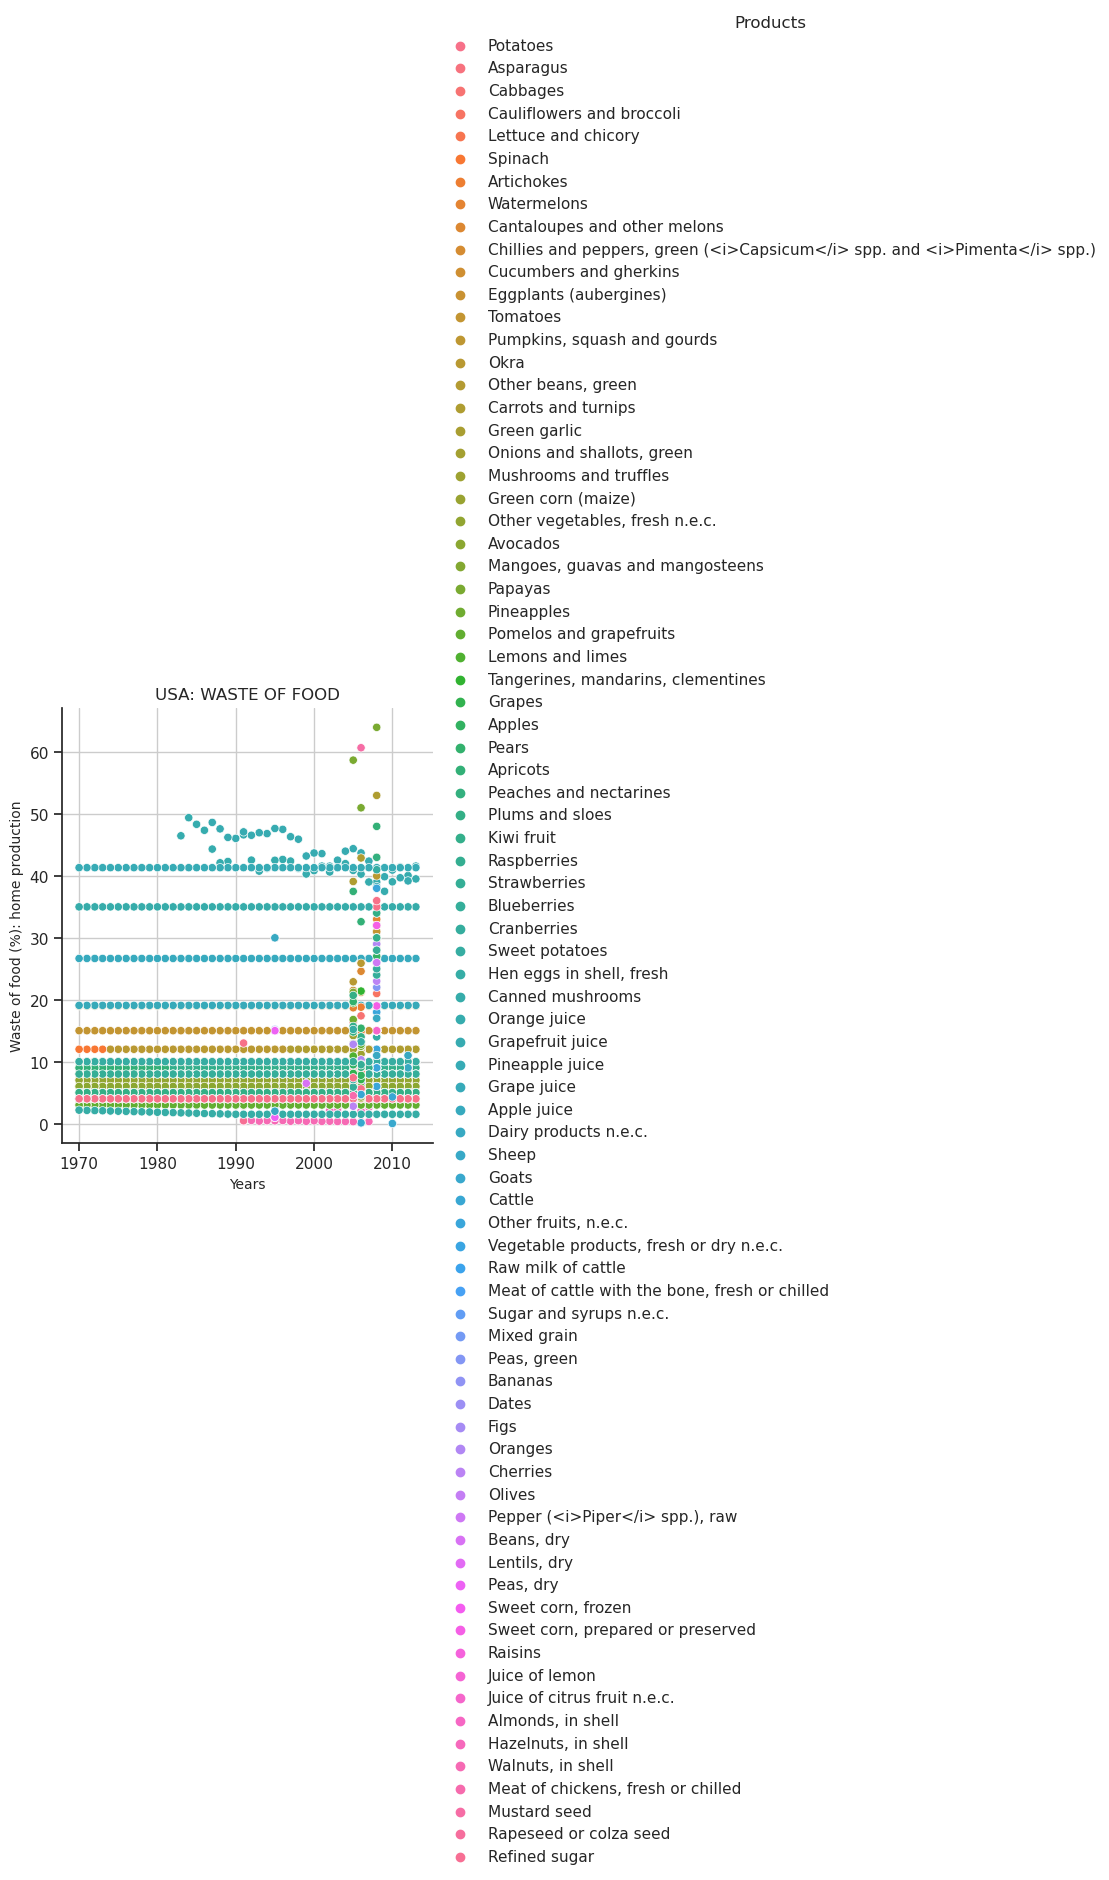

In [35]:
#plotting food waste in China
h = sns.relplot(data=waste_usa, x='year', y='loss_percentage', hue='commodity')

#labeling
h.legend.set_title('Products') #legend title
plt.title(f'USA: WASTE OF FOOD', fontsize=12) #plot TITLE
plt.xlabel('Years', fontsize=10) #x-axis label
plt.ylabel('Waste of food (%): home production', fontsize=10) #y-axis label

#plotting
plt.show()

I realize that the graph above is unclear when reading the percentages in reference to the products, but Ideliberately left it like this to give an idea of the huge amount of food waste that exists in the USA, in terms
of 'variety of products' wasted and in terms of waste rates.

The fundamental point is also that the US is a bit of a 'mirror of the West', in some way. This means
that, generally speakin, in the West, the food waste is not very dierent from what we can see in this graph,
and this must surely make us reect.

# CONCLUSIONI E RIFLESSIONI

We have seen that most agricultural or livestock products are made in order to be consumed by human
beings; we have seen which are the most polluting products in their production, in terms of total emissions
and greenhouse gas emissions, and we have also seen which are the most produced products in the world,
realizing that, tipically, they do not coincide with the most polluting.
We have seen that the most produced products are made in China, India and the USA; the rst two
are areas where the population has dramatically grown in the recent years, so an increase in production is
justiable; a little less justiable, however, is the increase in production - in comparison with the demographic
increase -in the USA, which has seen a great increase in the production of milk, which is one of those products
that, to be made, is among the more polluting.
We have also seen the waste of food, and we can say that in China the waste of food is generally very low,
while in the USA the waste of food is very high; on the other hand, since the USA is a bit 'the mirror' of
the West, we can expect that waste is similar throughout the whole West.
So... what could we do?
Personally, I believe that the work to be done is a lot and at dierent levels.
First of all, in the West it is necessary to reach much lower rates of food waste than those currently in
the USA. Secondly, the entire supply chain must be reviewed, trying to get as much as possible to the 'short
chain', with the aim of drastically reducing pollution due to the transport of food.
Another parameter to take into consideration is export; exporting products has a huge environmental
impact, both in terms of emissions and packaging. Let's ask ourselves one thing, for example: what's the
point of nding Sicilian oranges and Spanish oranges on the same supermarket counter? I think Europe
should create a more equitable internal market, able to regulate how goods of the same product should
circulate (based, for example, on the demand of each country), and then manage the extra-European export.
Finally, it should be noted that the country that, more than any other in the world, exports products
from the primary sector is the United States and one of the most exported products is milk (source: https://www.worldatlas.com/articles/the-american-food-giant-the-largest-exporter-of-food-in-the-world.html):
is there really all this need for milk in the world?

# NEXT STEPS

As said before, this is the original 'Data manipulation and visualization' project I made for the Data Science
course of Start to Impact. As many Data Science projects, it is never unclear when we have really nished
the work. Anyway, thinking by my self and with the coach's advice, these will be the next steps to widen
this study:
 study and use the Plotly library to improve some visualizations
 improve the graphs of the waste of food, categorizing some goods
 expand the study to the continents
 machine learning to foresee, for example, the increase of population and the food production